### üìä An√°lise de Vendas - Loja Fict√≠cia

#### 1. Introdu√ß√£o
#### 2. Carregamento dos Dados
#### 3. Explora√ß√£o Inicial dos Dados
#### 4. Limpeza e Prepara√ß√£o dos Dados
#### 5. An√°lise Explorat√≥ria (EDA)
#### 6. Conclus√µes e Insights

### 1. Introdu√ß√£o 
Este projeto tem como objetivo analisar as vendas de uma loja fict√≠cia entre 2023 e 2024. A partir dos dados, ser√£o extra√≠dos insights sobre os produtos mais vendidos, faturamento por regi√£o, desempenho por categoria, sazonalidade e mais.

Ferramentas utilizadas:
- Python (Pandas, Matplotlib, Seaborn)
- Jupyter Notebook

### 2. Carregamento dos Dados

In [13]:
import pandas as pd

# Carregar o CSV
df = pd.read_csv("dataset_vendas_loja.csv")

# Exibir as primeiras linhas
df.head()

Data da Venda         Produto    Categoria  Pre√ßo Unit√°rio  \
0    2023-04-08  Bolsa Feminina   Acess√≥rios             150   
1    2023-01-01  Bolsa Feminina   Acess√≥rios             150   
2    2023-06-13     Cal√ßa Jeans    Vestu√°rio             120   
3    2023-01-25  Fone de Ouvido  Eletr√¥nicos             200   
4    2023-02-18     Cal√ßa Jeans    Vestu√°rio             120   

   Quantidade Vendida        Regi√£o Vendedor  
0                   5      Nordeste  Daniela  
1                   5           Sul   Carlos  
2                   8       Sudeste    Bruno  
3                   3         Norte  Daniela  
4                   4  Centro-Oeste    Bruno

### 3. Explora√ß√£o Inicial dos Dados

In [18]:
# Ver tamanho do dataset
df.shape

(500, 7)

In [20]:
# Ver informa√ß√µes gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Data da Venda       500 non-null    object
 1   Produto             500 non-null    object
 2   Categoria           500 non-null    object
 3   Pre√ßo Unit√°rio      500 non-null    int64 
 4   Quantidade Vendida  500 non-null    int64 
 5   Regi√£o              500 non-null    object
 6   Vendedor            500 non-null    object
dtypes: int64(2), object(5)
memory usage: 27.5+ KB


In [22]:
# Ver estat√≠sticas b√°sicas
df.describe()

Pre√ßo Unit√°rio  Quantidade Vendida
count      500.000000          500.000000
mean       694.800000            5.630000
std       1075.752689            2.941838
min         70.000000            1.000000
25%        120.000000            3.000000
50%        200.000000            6.000000
75%        300.000000            8.000000
max       3500.000000           10.000000

In [24]:
# Ver colunas √∫nicas
df.nunique()

Data da Venda         277
Produto                 9
Categoria               4
Pre√ßo Unit√°rio          9
Quantidade Vendida     10
Regi√£o                  5
Vendedor                8
dtype: int64

### 4. Limpeza e Prepara√ß√£o dos Dados

In [33]:
# Converter a coluna de data
df["Data da Venda"] = pd.to_datetime(df["Data da Venda"])

# Criar colunas de Ano, M√™s e Faturamento
df["Ano"] = df["Data da Venda"].dt.year
df["M√™s"] = df["Data da Venda"].dt.month
df["Faturamento"] = df["Pre√ßo Unit√°rio"] * df["Quantidade Vendida"]
df.head()

Data da Venda         Produto    Categoria  Pre√ßo Unit√°rio  \
0    2023-04-08  Bolsa Feminina   Acess√≥rios             150   
1    2023-01-01  Bolsa Feminina   Acess√≥rios             150   
2    2023-06-13     Cal√ßa Jeans    Vestu√°rio             120   
3    2023-01-25  Fone de Ouvido  Eletr√¥nicos             200   
4    2023-02-18     Cal√ßa Jeans    Vestu√°rio             120   

   Quantidade Vendida        Regi√£o Vendedor   Ano  M√™s  Faturamento  
0                   5      Nordeste  Daniela  2023    4          750  
1                   5           Sul   Carlos  2023    1          750  
2                   8       Sudeste    Bruno  2023    6          960  
3                   3         Norte  Daniela  2023    1          600  
4                   4  Centro-Oeste    Bruno  2023    2          480

In [35]:
# Verificar valores ausentes
df.isnull().sum()

Data da Venda         0
Produto               0
Categoria             0
Pre√ßo Unit√°rio        0
Quantidade Vendida    0
Regi√£o                0
Vendedor              0
Ano                   0
M√™s                   0
Faturamento           0
dtype: int64

### 5. An√°lise Explorat√≥ria (EDA)

#### Produtos mais vendidos

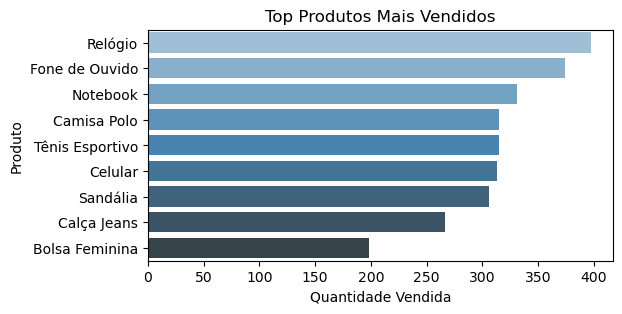

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,3))
sns.barplot(
    x=top_produtos.values, 
    y=top_produtos.index, 
    hue=top_produtos.index, 
    palette="Blues_d", 
    legend=False
)
plt.title("Top Produtos Mais Vendidos")
plt.xlabel("Quantidade Vendida")
plt.ylabel("Produto")
plt.show()

#### Faturamento por Categoria

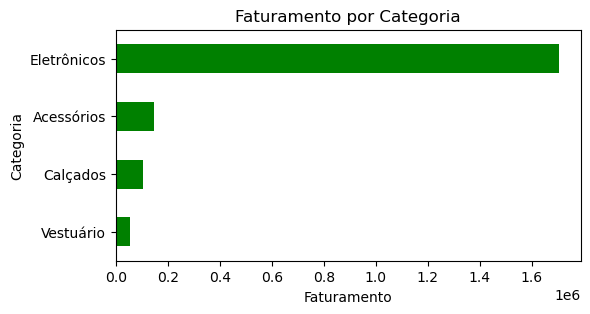

In [46]:
cat_fat = df.groupby("Categoria")["Faturamento"].sum().sort_values()

plt.figure(figsize=(6,3))
cat_fat.plot(kind="barh", color="green")
plt.title("Faturamento por Categoria")
plt.xlabel("Faturamento")
plt.ylabel("Categoria")
plt.show()

#### Faturamento por Regi√£o

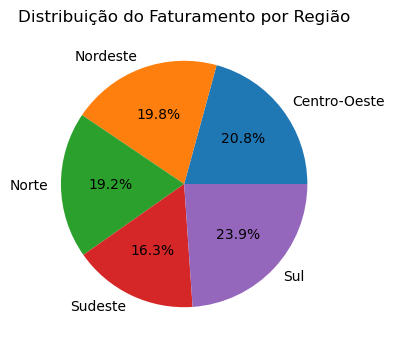

In [55]:
df.groupby("Regi√£o")["Faturamento"].sum().plot(kind="pie", autopct="%.1f%%", figsize=(4,4))
plt.title("Distribui√ß√£o do Faturamento por Regi√£o")
plt.ylabel("")
plt.show()

#### Faturamento ao Longo do Tempo

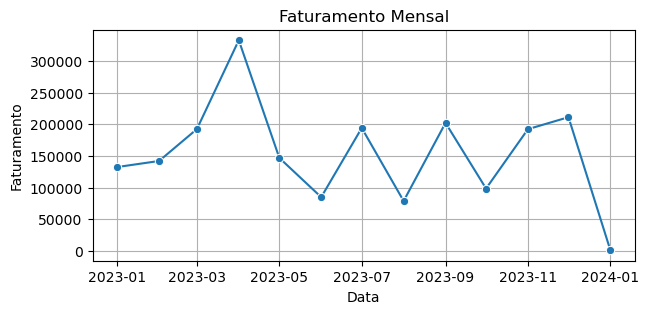

In [66]:
# Renomeia colunas para o formato aceito pelo pandas
df_mensal_ajustado = df_mensal.rename(columns={"Ano": "year", "M√™s": "month"})

# Cria a coluna "Data" com dia fixo como 1¬∫
df_mensal["Data"] = pd.to_datetime(df_mensal_ajustado[["year", "month"]].assign(day=1))


plt.figure(figsize=(7,3))
sns.lineplot(data=df_mensal, x="Data", y="Faturamento", marker="o")
plt.title("Faturamento Mensal")
plt.xlabel("Data")
plt.ylabel("Faturamento")
plt.grid(True)
plt.show()

### 6. Conclus√µes e Insights 

In [82]:
# Produto mais vendido em quantidade:
df.groupby("Produto")["Quantidade Vendida"].sum().sort_values(ascending=False).head(1)

Produto
Rel√≥gio    397
Name: Quantidade Vendida, dtype: int64

In [86]:
# Produto com maior faturamento:
df.groupby("Produto")["Faturamento"].sum().sort_values(ascending=False).head(1)

Produto
Notebook    1158500
Name: Faturamento, dtype: int64

In [88]:
# Regi√£o com maior faturamento:
df.groupby("Regi√£o")["Faturamento"].sum().sort_values(ascending=False)

Regi√£o
Sul             480170
Centro-Oeste    416850
Nordeste        397630
Norte           385910
Sudeste         328240
Name: Faturamento, dtype: int64

In [90]:
# Categoria com maior faturamento:
df.groupby("Categoria")["Faturamento"].sum().sort_values(ascending=False)

Categoria
Eletr√¥nicos    1702800
Acess√≥rios      148800
Cal√ßados        103230
Vestu√°rio        53970
Name: Faturamento, dtype: int64

In [92]:
# M√™s com maior faturamento:
df_mensal.sort_values("Faturamento", ascending=False).head(1)

Ano  M√™s  Faturamento       Data
3  2023    4       332650 2023-04-01

In [94]:
# Vendedor com maior faturamento:
df.groupby("Vendedor")["Faturamento"].sum().sort_values(ascending=False).head(1)

Vendedor
Gabriel    369810
Name: Faturamento, dtype: int64

#### Principais Insights:

- Produto mais vendido em quantidade:
Rel√≥gio, com 397 unidades vendidas.

- Produto com maior faturamento:
Notebook, gerando R$1.158.500 em receita.

- Regi√£o com maior faturamento:
Sul, com aproximadamente R$480.170 em vendas.

- Categoria com maior faturamento:
Eletr√¥nicos, totalizando R$1.702.800.

- M√™s com maior faturamento:
Abril/2023, com R$332.650.

- Vendedor com melhor desempenho:
Gabriel, com um faturamento total de R$369.810.